### Introduction to Decision Trees

**OBJECTIVES**

- Understand how a decision tree is built for classification and regression
- Fit decision tree models using `scikit-learn`
- Compare and evaluate classifiers 

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import DecisionBoundaryDisplay

**Homework**

In [2]:
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

from sklearn import set_config
set_config(transform_output="pandas")

In [3]:
kidney = fetch_openml(data_id=42972).frame
kidney.head()

id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns]

In [4]:
kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [5]:
kidney['rc'] = kidney['rc'].replace({"'t?'":np.nan}).replace("'t43'", np.nan).astype('float')
kidney['pcv'] = kidney['pcv'].replace("'t?'", np.nan).replace("'t43'", np.nan).astype('float')
kidney['wc'] = kidney['wc'].replace("'t6200'", np.nan).replace("'t8400'").replace("'t?'", np.nan).astype('float')

kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             328 non-null    float64
 17  wc              293 non-null    flo

/var/folders/8v/7bhy8yqn04b7rzqglb2s38200000gn/T/ipykernel_122/1048509165.py:3: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  kidney['wc'] = kidney['wc'].replace("'t6200'", np.nan).replace("'t8400'").replace("'t?'", np.nan).astype('float')


In [6]:
cat_cols = kidney.select_dtypes('object').columns.tolist()
cat_cols = cat_cols[:-1]

num_cols = kidney.select_dtypes('number').columns.tolist()


ohe = OneHotEncoder(sparse_output=False)
imp_num = SimpleImputer(strategy = 'mean')
imp_cat = SimpleImputer(strategy = 'most_frequent')
scale = StandardScaler()

imputer = make_column_transformer((imp_num, num_cols),
                             (imp_cat, cat_cols),
                                verbose_feature_names_out=False,
                             remainder = 'passthrough')
ohe = make_column_transformer((ohe, cat_cols),
                              remainder = scale)


X_train, X_test, y_train, y_test = train_test_split(kidney.iloc[:, :-1], kidney.iloc[:, -1])

### Customer Churn

In [7]:
churn = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa24/refs/heads/main/data/cell_phone_churn.csv')

In [8]:
churn.head()

state  account_length  area_code intl_plan vmail_plan  vmail_message  \
0    KS             128        415        no        yes             25   
1    OH             107        415        no        yes             26   
2    NJ             137        415        no         no              0   
3    OH              84        408       yes         no              0   
4    OK              75        415       yes         no              0   

   day_mins  day_calls  day_charge  eve_mins  eve_calls  eve_charge  \
0     265.1        110       45.07     197.4         99       16.78   
1     161.6        123       27.47     195.5        103       16.62   
2     243.4        114       41.38     121.2        110       10.30   
3     299.4         71       50.90      61.9         88        5.26   
4     166.7        113       28.34     148.3        122       12.61   

   night_mins  night_calls  night_charge  intl_mins  intl_calls  intl_charge  \
0       244.7           91         11.01       10.0           3         2.70   
1       254.4          103         11.45       13.7           3         3.70   
2       162.6          104          7.32       12.2           5         3.29   
3       196.9           89          8.86        6.6           7         1.78   
4       186.9          121          8.41       10.1           3         2.73   

   custserv_calls  churn  
0               1  False  
1               1  False  
2               0  False  
3               2  False  
4               3  False

**Problem**

- Can you determine a value to break the data apart that seperates churn from not churn for the `day_mins`? What about the `custserv_calls`?

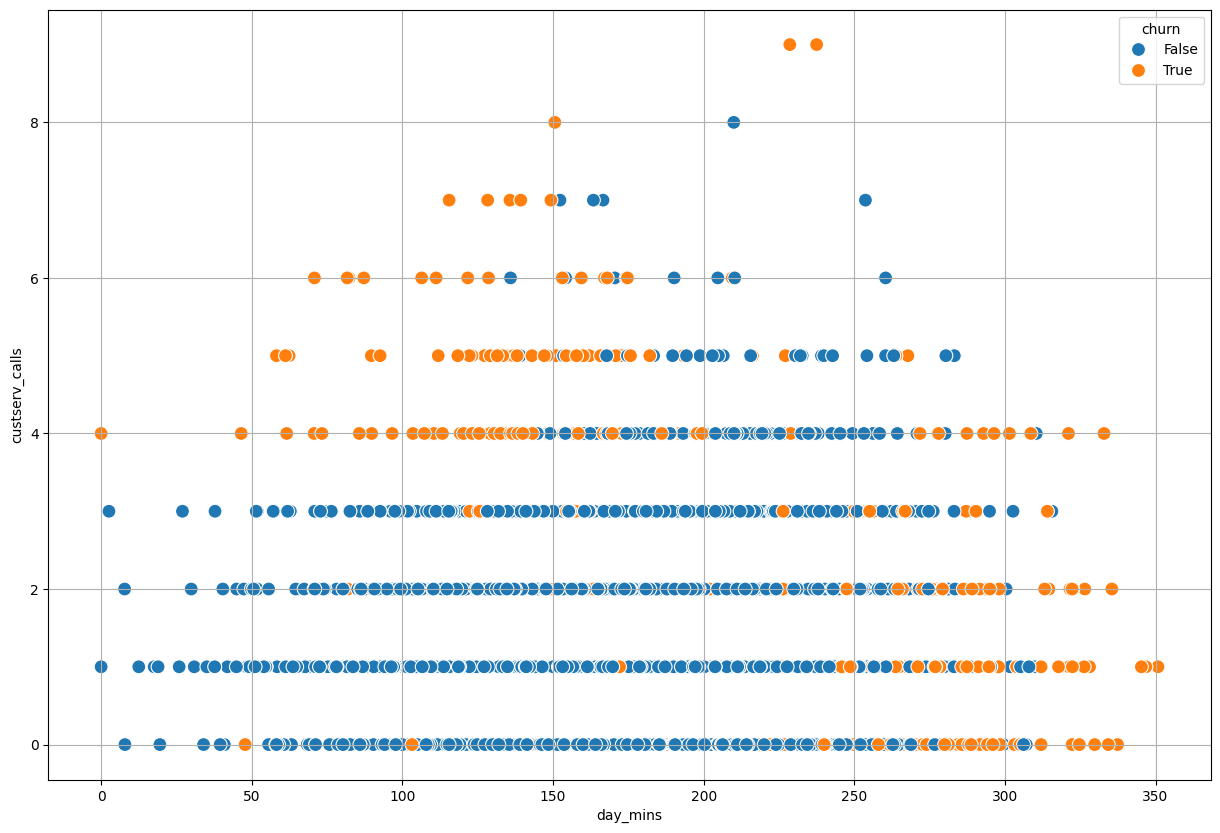

In [9]:
plt.figure(figsize = (15, 10))
sns.scatterplot(data = churn, x = 'day_mins', y = 'custserv_calls', hue = 'churn', s = 100)
plt.grid();

In [10]:
tree = DecisionTreeClassifier(max_depth = 2, criterion='entropy')

In [11]:
X = churn[['day_mins', 'custserv_calls']]
y = churn['churn']

In [12]:
tree.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

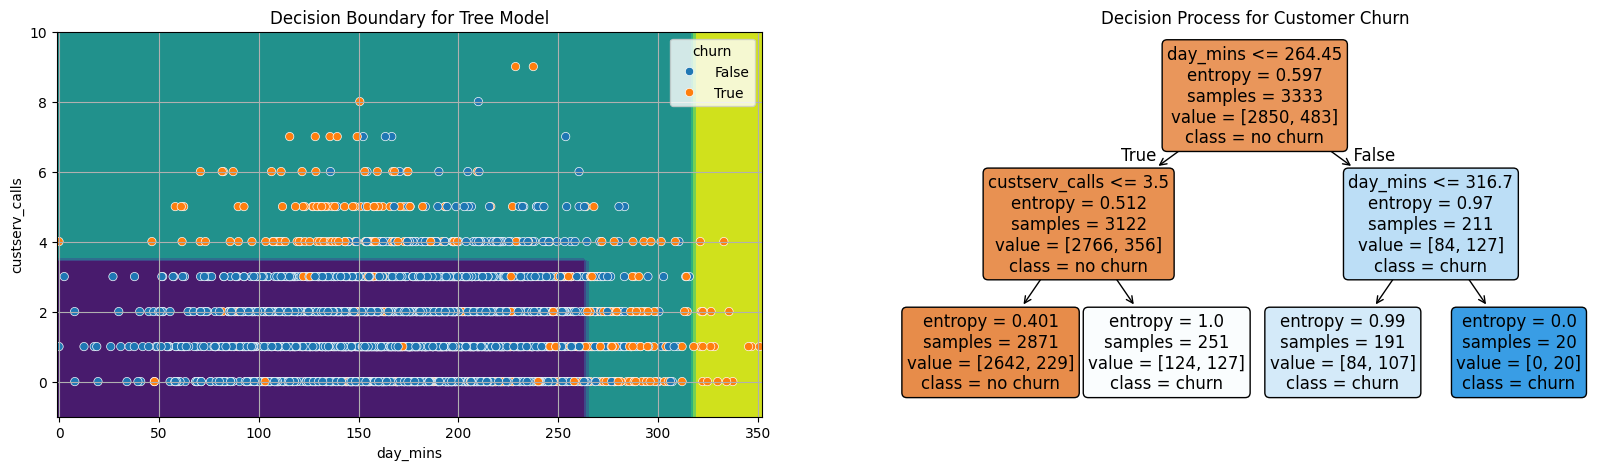

In [13]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
DecisionBoundaryDisplay.from_estimator(tree, X, ax = ax[0])
sns.scatterplot(data = X, x = 'day_mins', y = 'custserv_calls', hue = y, ax = ax[0])
ax[0].grid()
ax[0].set_title('Decision Boundary for Tree Model');
plot_tree(tree, feature_names=X.columns,
         filled = True,
         fontsize = 12,
         ax = ax[1],
         rounded = True,
         class_names = ['no churn', 'churn'])
ax[1].set_title('Decision Process for Customer Churn');

#### Titanic Dataset

In [14]:
#load the data
titanic = sns.load_dataset('titanic')
titanic.head(5) #shows first five rows of data

survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True

In [15]:
#subset the data to binary columns
data = titanic.loc[:4, ['alone', 'adult_male', 'survived']]
data

alone  adult_male  survived
0  False        True         0
1  False       False         1
2   True       False         1
3  False       False         1
4   True        True         0

Suppose you want to use a single column to predict if a passenger survives or not.  Which column will do a better job predicting survival in the sample dataset above?

### Entropy

One way to quantify the quality of the split is to use a quantity called **entropy**.  This is determined by:

$$H = - \sum p_i \log p_i $$

With a decision tree the idea is to select a feature that produces less entropy.  

In [16]:
#all the same -- probability = 1
1*np.log2(1)

0.0

In [17]:
#half and half -- probability = .5
-(1/2*np.log2(1/2) + 1/2*np.log2(1/2))

1.0

In [18]:
#plot of entropy
def entropy(p):
    return -(p*np.log2(p) + (1-p)*np.log2(1 - p))

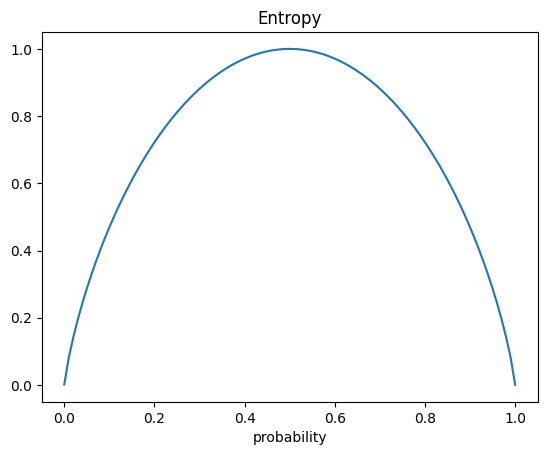

In [19]:
p = np.linspace(0.0001, .99999, 100)
plt.plot(p, entropy(p))
plt.title('Entropy')
plt.xlabel('probability');

In [20]:
#subset the data to age, pclass, and survived five rows
data = titanic.loc[:4, ['age', 'pclass', 'survived']]
data

age  pclass  survived
0  22.0       3         0
1  38.0       1         1
2  26.0       3         1
3  35.0       1         1
4  35.0       3         0

In [21]:
data.loc[data['pclass'] == 1]

age  pclass  survived
1  38.0       1         1
3  35.0       1         1

In [22]:
#compute entropy for pclass
#first class entropy
first_class_entropy = -(2/2*np.log2(2/2))
first_class_entropy

-0.0

In [23]:
data.loc[data['pclass'] != 1]

age  pclass  survived
0  22.0       3         0
2  26.0       3         1
4  35.0       3         0

In [24]:
#pclass entropy
third_class_entropy = -(1/3*np.log2(1/3) + 2/3*np.log2(2/3))
third_class_entropy

0.9182958340544896

In [25]:
#weighted sum of these
pclass_entropy = 2/5*first_class_entropy + 3/5*third_class_entropy
pclass_entropy

0.5509775004326937

In [26]:
data

age  pclass  survived
0  22.0       3         0
1  38.0       1         1
2  26.0       3         1
3  35.0       1         1
4  35.0       3         0

In [27]:
#splitting on age < 30
entropy_left = -(1/2*np.log2(1/2) + 1/2*np.log2(1/2))
entropy_right = -(1/3*np.log2(1/3) + 2/3*np.log2(2/3))
entropy_age = 2/5*entropy_left + 3/5*entropy_right
entropy_age

0.9509775004326937

In [28]:
data

age  pclass  survived
0  22.0       3         0
1  38.0       1         1
2  26.0       3         1
3  35.0       1         1
4  35.0       3         0

In [29]:
#original entropy
original_entropy = -((3/5)*np.log2(3/5) + (2/5)*np.log2(2/5))
original_entropy 

0.9709505944546686

In [30]:
# improvement based on pclass
original_entropy - pclass_entropy

0.4199730940219749

In [31]:
#improvement based on age < 30
original_entropy - entropy_age

0.01997309402197489

#### Using `sklearn`

The `DecisionTreeClassifier` can use `entropy` to build a full decision tree model.  

In [32]:
X = data[['age', 'pclass']]
y = data['survived']

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
#DecisionTreeClassifier?

In [35]:
#instantiate
tree2 = DecisionTreeClassifier(criterion='entropy', max_depth = 1)

In [36]:
#fit
tree2.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

In [37]:
#score it
tree2.score(X, y)

0.8

In [38]:
#predictions
tree2.predict(X)

array([0, 1, 0, 1, 0])

#### Visualizing the results

The `plot_tree` function will plot the decision tree model after fitting.  There are many options you can use to control the resulting tree drawn.

In [39]:
from sklearn.tree import plot_tree

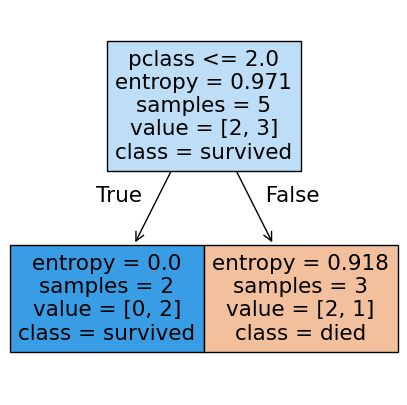

In [40]:
#plot_tree
fig, ax = plt.subplots(figsize = (5,5))
plot_tree(tree2, 
          feature_names=X.columns, 
          class_names=['died', 'survived'], filled = True);

**PROBLEM**

Build a Logistic Regression and Decision Tree pipeline to predict purchase.  Assign the positive predictions probabilities to the variables `plgr` and `ptree` respectively.

In [80]:
purchase_data = pd.read_csv('https://raw.githubusercontent.com/jfkoehler/nyu_bootcamp_fa25/refs/heads/main/data/bank-direct-marketing-campaigns.csv')

In [81]:
purchase_data.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

In [43]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [44]:
cat_cols = purchase_data.select_dtypes('object').columns.tolist()
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [45]:
cat_cols.remove('y')

In [46]:
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [48]:
encoder = make_column_transformer((OneHotEncoder(sparse_output=False), cat_cols),
                                 remainder = StandardScaler(),
                                 verbose_feature_names_out=False)

knn_pipe = Pipeline([('transform', encoder), ('model', KNeighborsClassifier(n_neighbors=3))])

In [49]:
X = purchase_data.iloc[:, :-1]
y = purchase_data['y']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11, stratify = y)

In [51]:
knn_pipe.fit(X, y)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('transform',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse_output=False),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'day_of_week',
                                                   'poutcome'])],
                                   verbose_feature_names_out=False)),
                ('model', KNeighborsClassifier(n_neighbors=3))])

In [52]:
knn_pipe.score(X, y)

0.9249295911430514

In [53]:
y.value_counts(normalize = True)

y
no     0.887346
yes    0.112654
Name: proportion, dtype: float64

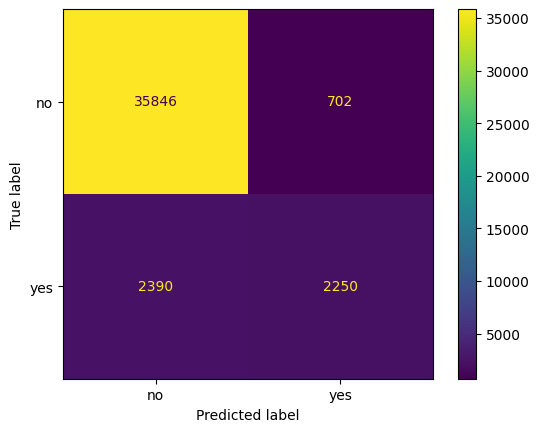

In [54]:
ConfusionMatrixDisplay.from_estimator(knn_pipe, X, y)

In [55]:
prob_positive = knn_pipe.predict_proba(X)[:, 1]
prob_positive

array([0.        , 0.        , 0.        , ..., 0.33333333, 0.33333333,
       0.66666667])

In [56]:
results = pd.DataFrame({'y': y, 'prob_pos': prob_positive})

In [57]:
results.head()

y  prob_pos
0  no       0.0
1  no       0.0
2  no       0.0
3  no       0.0
4  no       0.0

In [58]:
results = results.sort_values(by = 'prob_pos', ascending = False)
results.reset_index(inplace = True, drop = True)

In [59]:
results.head()

y  prob_pos
0  yes       1.0
1  yes       1.0
2  yes       1.0
3  yes       1.0
4  yes       1.0

In [60]:
results.iloc[:41188//10, :]['y'].value_counts()

y
yes    2634
no     1484
Name: count, dtype: int64

In [61]:
y.value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [62]:
2634/4640

0.5676724137931034

In [63]:
results.iloc[:(41188//10)*2, :]['y'].value_counts()

y
no     4265
yes    3971
Name: count, dtype: int64

In [64]:
3971/4640

0.8558189655172413

What does it mean?  If we use our model to contact 20% of the most probable to subscribe customers, we would be able to target 85% of the positives.

**Problem**

Build a `DecisionTreeClassifier` pipeline to predict purchase, grid searching `max_depth` parameter.  Is this better than the knn model in terms of lift when constrained to the 20% most likely customers to churn.

In [65]:
tree_pipe = Pipeline([('transform', encoder), ('model', DecisionTreeClassifier())])
params = {'model__max_depth': [1, 2, 3, 4, 5, 6, 7]} #fill in the appropriate parameter
tree_grid = GridSearchCV(tree_pipe, param_grid=params)

In [66]:
tree_grid.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


GridSearchCV(estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder=StandardScaler(),
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(sparse_output=False),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'day_of_week',
                                                                          'poutcome'])],
                                                          verbose_feature_names_out=False)),
                                       ('model', DecisionTreeClassifier())]),
             param_grid={'model__max_depth': [1, 2, 3, 4, 5, 6, 7]})

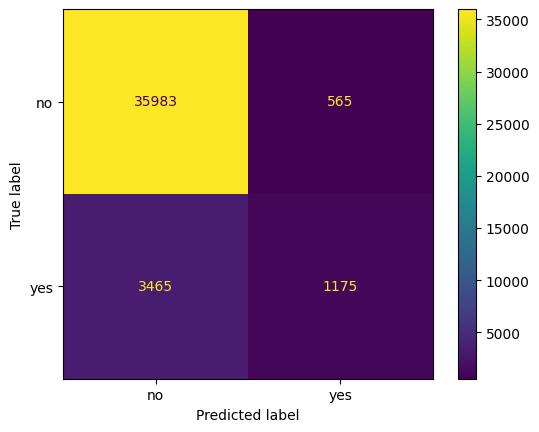

In [67]:
ConfusionMatrixDisplay.from_estimator(tree_grid, X, y)

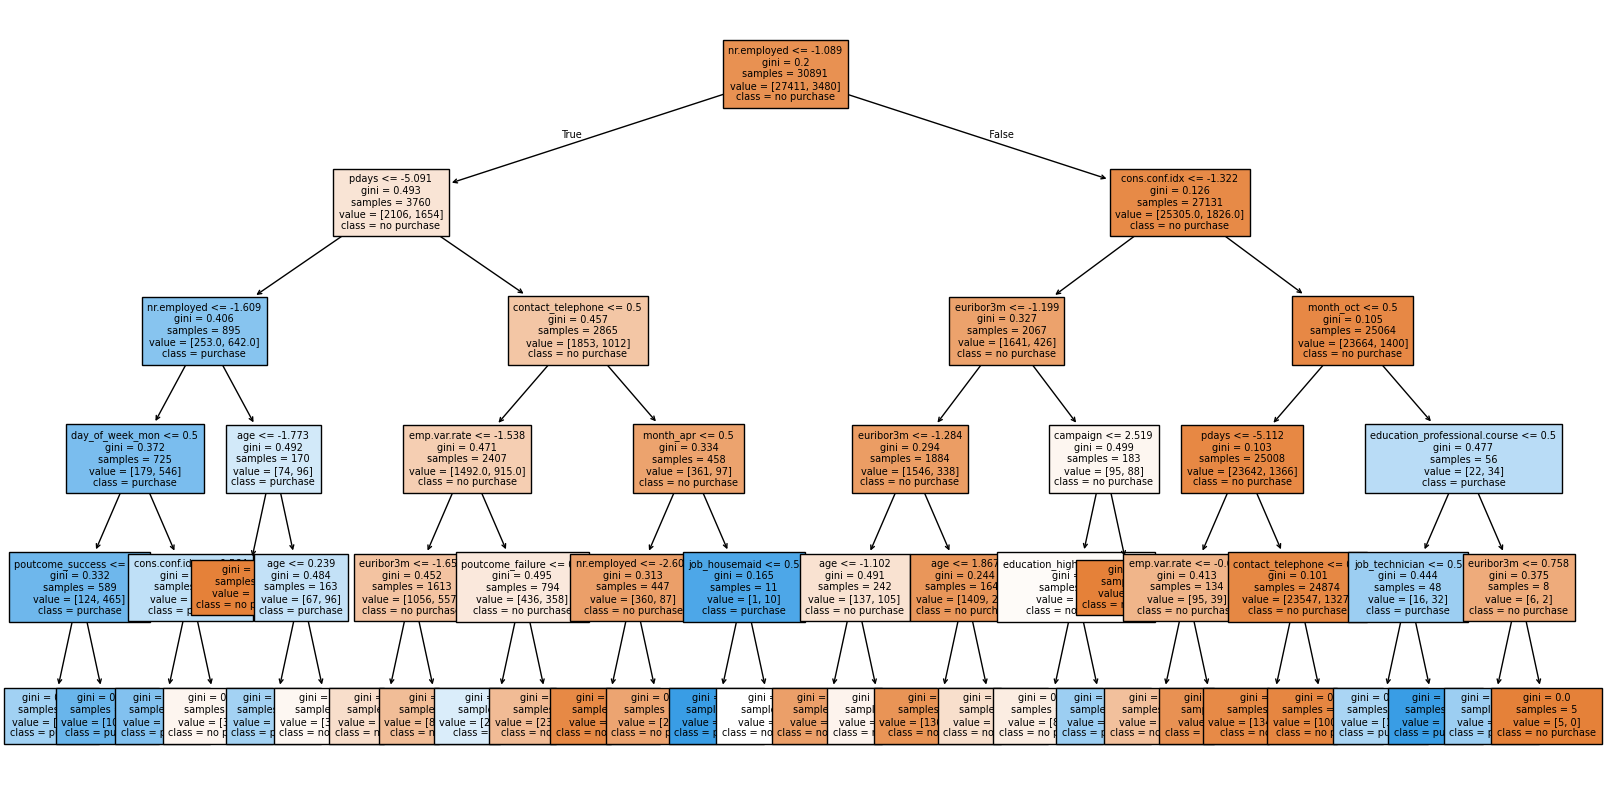

In [68]:
plt.figure(figsize = (20, 10))
plot_tree(tree_grid.best_estimator_['model'], feature_names=tree_pipe['transform'].get_feature_names_out(),
         class_names = ['no purchase', 'purchase'],
         filled = True,
         fontsize=7);

**Problem**

For next class, read the chapter "Decision Analytic Thinking: What's a Good Model?" from *Data Science for Business*.  Pay special attention to the cost benefit analysis.  You will be asked to use cost/benefit analysis to determine the "best" classifier for an example dataset next class.



![](images/costben.png) 


In [69]:
#example cost benefit matrix
cost_benefits = np.array([ [0, -1], [0, 99]])
cost_benefits

array([[ 0, -1],
       [ 0, 99]])

The **expected value** is computed by:

$$\text{Expected Profit} = p(Y,p)*b(Y, p) + p(N, p)*b(N,p) + p(N,n)*b(N,n) + p(Y,n)*b(Y,n)$$

use this to calculate the expected profit of the Decision Tree and KNN Regression model.  Which is better?  Expected Value and argument in slack.

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
mat = confusion_matrix(y, tree_grid.predict(X))

In [72]:
mat

array([[35983,   565],
       [ 3465,  1175]])

In [73]:
mat.sum()

41188

In [74]:
mat/mat.sum()

array([[0.87362824, 0.01371759],
       [0.08412644, 0.02852773]])

In [75]:
(mat/mat.sum())*cost_benefits

array([[ 0.        , -0.01371759],
       [ 0.        ,  2.82424493]])

In [76]:
#expected profit for decision tree model
(((mat/mat.sum())*cost_benefits)).sum()

2.810527338059629

In [77]:
knn_mat = confusion_matrix(y, knn_pipe.predict(X))

In [78]:
knn_mat/knn_mat.sum()

array([[0.87030203, 0.0170438 ],
       [0.05802661, 0.05462756]])

In [79]:
#expected profit for logistic model
((knn_mat/knn_mat.sum())*cost_benefits).sum()

5.391084781975333

**EXIT TICKET**: [here](https://forms.gle/q3Wqwh9b6istQiP47)